In [8]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
sales_data = pd.read_csv('Data/sales_data.csv')

In [10]:
sales_data['Sale_Date']= pd.to_datetime(sales_data['Sale_Date'],errors='coerce')

In [11]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Product_ID            1000 non-null   int64         
 1   Sale_Date             379 non-null    datetime64[ns]
 2   Sales_Rep             1000 non-null   object        
 3   Region                1000 non-null   object        
 4   Region_and_Sales_Rep  1000 non-null   object        
 5   Product_Category      1000 non-null   object        
 6   Unit_Cost             1000 non-null   float64       
 7   Unit_Price            1000 non-null   float64       
 8   Quantity_Sold         1000 non-null   int64         
 9   Sales_Amount          1000 non-null   float64       
 10  Discount              1000 non-null   float64       
 11  Customer_Type         1000 non-null   object        
 12  Payment_Method        1000 non-null   object        
 13  Sales_Channel      

In [12]:
sales_data.drop('Region_and_Sales_Rep',axis = 1,inplace = True)

In [13]:
sales_data.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Product_Category,Unit_Cost,Unit_Price,Quantity_Sold,Sales_Amount,Discount,Customer_Type,Payment_Method,Sales_Channel
0,1052,2023-03-02,Bob,North,Furniture,152.75,267.22,18,5053.97,0.09,Returning,Cash,Online
1,1093,NaT,Bob,West,Furniture,3816.39,4209.44,17,4384.02,0.11,Returning,Cash,Retail
2,1015,NaT,David,South,Food,261.56,371.40,30,4631.23,0.20,Returning,Bank Transfer,Retail
3,1072,NaT,Bob,South,Clothing,4330.03,4467.75,39,2167.94,0.02,New,Credit Card,Retail
4,1061,NaT,Charlie,East,Electronics,637.37,692.71,13,3750.20,0.08,New,Credit Card,Online


In [14]:
print(sales_data['Sales_Rep'].unique())
print('')
print(sales_data['Region'].unique())
print('')
print(sales_data['Product_Category'].unique())
print('')
print(sales_data['Payment_Method'].unique())
print('')
print(sales_data['Sales_Channel'].unique())

['Bob' 'David' 'Charlie' 'Eve' 'Alice']

['North' 'West' 'South' 'East']

['Furniture' 'Food' 'Clothing' 'Electronics']

['Cash' 'Bank Transfer' 'Credit Card']

['Online' 'Retail']


In [15]:
sales_data['Profit per Unit'] = (sales_data['Unit_Price'] - sales_data['Unit_Cost'])

In [16]:
sales_data.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Product_Category,Unit_Cost,Unit_Price,Quantity_Sold,Sales_Amount,Discount,Customer_Type,Payment_Method,Sales_Channel,Profit per Unit
0,1052,2023-03-02,Bob,North,Furniture,152.75,267.22,18,5053.97,0.09,Returning,Cash,Online,114.47
1,1093,NaT,Bob,West,Furniture,3816.39,4209.44,17,4384.02,0.11,Returning,Cash,Retail,393.05
2,1015,NaT,David,South,Food,261.56,371.40,30,4631.23,0.20,Returning,Bank Transfer,Retail,109.84
3,1072,NaT,Bob,South,Clothing,4330.03,4467.75,39,2167.94,0.02,New,Credit Card,Retail,137.72
4,1061,NaT,Charlie,East,Electronics,637.37,692.71,13,3750.20,0.08,New,Credit Card,Online,55.34


In [17]:
sales_data.rename(columns={'Quantity_Sold':'Qty_Sold','Profit per Unit' : 'Profit/Unit'},inplace = True)

In [18]:
print('Total Qty_sold - ',sales_data['Qty_Sold'].sum().round(2))
print('')
print('Total unit_cost - ',sales_data['Unit_Cost'].sum().round(2))
print('')
print('Total unit_price - ',sales_data['Unit_Price'].sum().round(2))

Total Qty_sold -  25355

Total unit_cost -  2475304.55

Total unit_price -  2728440.12


## Total Returning Customers

In [19]:
print('Count of Returning Customer - ',(sales_data['Customer_Type'] == 'Returning').sum())
print('')
print('Count of New Customer - ',(sales_data['Customer_Type'] == 'New').sum())

Count of Returning Customer -  496

Count of New Customer -  504


# Region-wise Sales

In [20]:
region_sales = sales_data.groupby(['Region'],as_index= False)['Sales_Amount'].sum()
region_sales

,Region,Sales_Amount
0,East,1259792.93
1,North,1369612.51
2,South,1154250.86
3,West,1235608.93


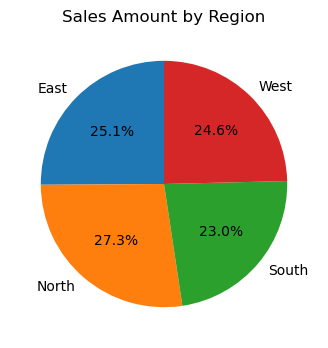

In [21]:
labels = region_sales['Region']
sizes = region_sales['Sales_Amount']


plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Sales Amount by Region')
plt.show()

## Sales by Customer Type (Returning or New)

In [22]:
customer_data = sales_data.groupby(['Customer_Type'],as_index= False)[['Qty_Sold','Unit_Price','Sales_Amount']].sum()
customer_data

,Customer_Type,Qty_Sold,Unit_Price,Sales_Amount
0,New,13184,1393911.70,2506258.30
1,Returning,12171,1334528.42,2513006.93


<Axes: xlabel='Customer_Type', ylabel='Qty_Sold'>

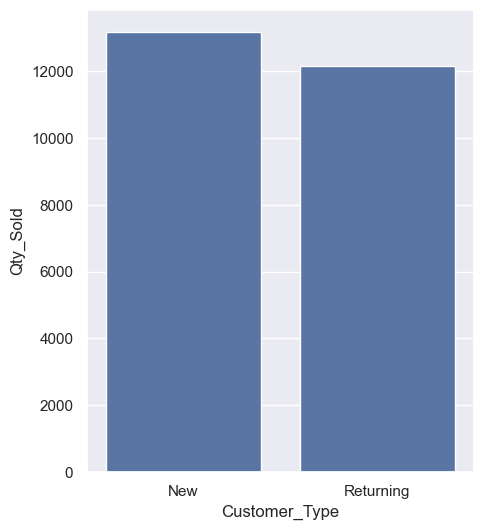

In [28]:
sns.set(rc={'figure.figsize':(5,6)})
sns.barplot(data = customer_data, x = 'Customer_Type',y= 'Qty_Sold')

## Sales_Rep V/S Customer_Type

In [29]:
sales_rep = sales_data.groupby(['Sales_Rep'],as_index= False)['Customer_Type'].count()
sales_rep

,Sales_Rep,Customer_Type
0,Alice,192
1,Bob,208
2,Charlie,169
3,David,222
4,Eve,209


<Axes: xlabel='Sales_Rep', ylabel='Customer_Type'>

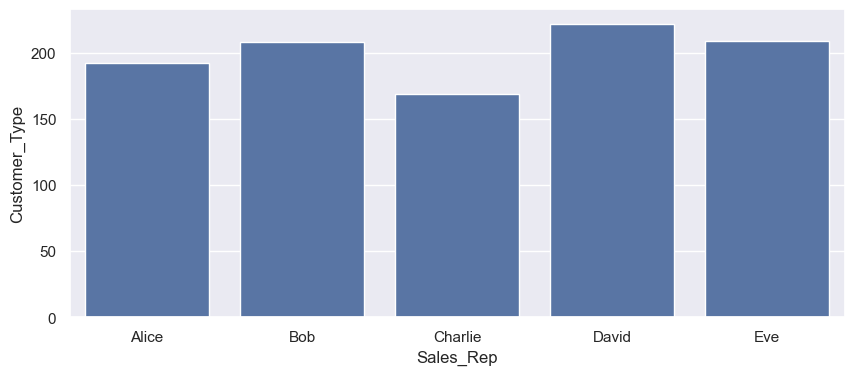

In [55]:
sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(data= sales_rep, x= 'Sales_Rep', y= 'Customer_Type')

## Top Sales representative by sales

In [36]:
top_sales_rep = sales_data.groupby(['Sales_Rep'],as_index= False)['Sales_Amount'].sum()

top_sales_rep.loc[top_sales_rep['Sales_Amount'].idxmax()] 

top_sales_rep.iloc[top_sales_rep['Sales_Amount'].idxmax()] 

Sales_Rep            David
Sales_Amount    1141737.36
Name: 3, dtype: object

In [ ]:
#Explanation

#Why both iloc[] and loc[] work in this case:
#idxmax() returns the default index (which is an integer like 3 in your case).
#iloc[3] accesses the row by position, which works because 3 corresponds to the integer position of the row.
#loc[3] also works because 3 is an integer, and pandas can treat the integer as a valid index label if the default index is integers.


#So, why does it work with both iloc[] and loc[]?
#iloc[] accesses the row by its position, and since idxmax() returns an integer index, it's directly usable.
#loc[] accesses the row by its label, and since 3 is a valid index label in your case, loc[3] also works without issues.

## Customer type and Different payment methods 

In [37]:
cust_payment = sales_data.groupby(['Payment_Method'],as_index= False)['Customer_Type'].count()
cust_payment

,Payment_Method,Customer_Type
0,Bank Transfer,342
1,Cash,313
2,Credit Card,345


<Axes: xlabel='Payment_Method', ylabel='Customer_Type'>

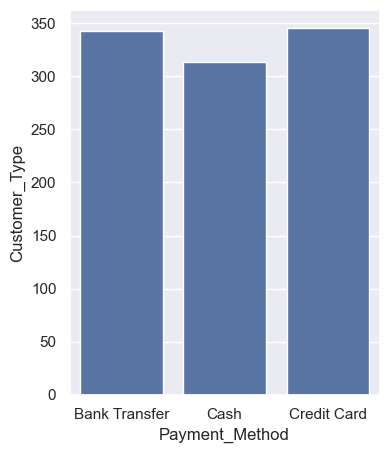

In [39]:
sns.set(rc={'figure.figsize':(4,5)})
sns.barplot(data= cust_payment, x= 'Payment_Method', y= 'Customer_Type')

## Customer type and Different payment methods pivot

In [40]:
cust_payment_pivot = sales_data.groupby(['Payment_Method','Customer_Type'],as_index= False).size()

cust_payment_pivot.pivot(index='Payment_Method', columns= 'Customer_Type',values= 'size' )

Customer_Type,New,Returning
Payment_Method,,
Bank Transfer,181,161
Cash,160,153
Credit Card,163,182


<Axes: xlabel='Payment_Method', ylabel='size'>

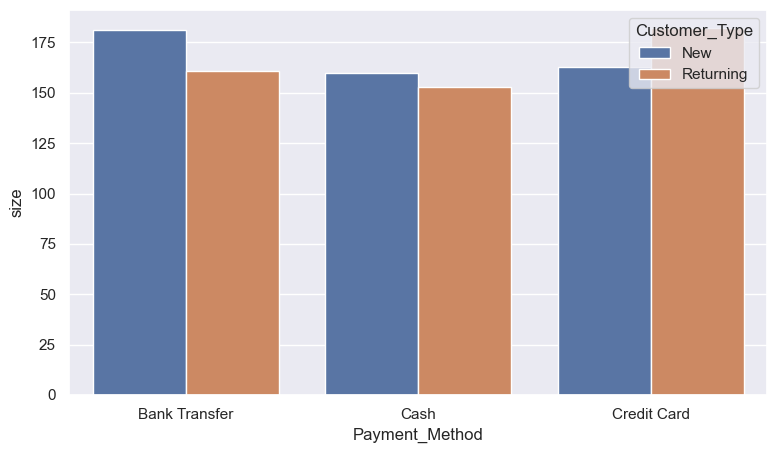

In [41]:
sns.set(rc={'figure.figsize':(9,5)})
sns.barplot(data= cust_payment_pivot, x= 'Payment_Method', hue= 'Customer_Type',y = 'size')

## Sales by Product category

In [42]:
product_sales = sales_data.groupby(['Product_Category'],as_index= False)['Sales_Amount'].sum()
product_sales

,Product_Category,Sales_Amount
0,Clothing,1313474.36
1,Electronics,1243499.64
2,Food,1201773.54
3,Furniture,1260517.69


## Total (Quantity sold ,  price , cost , sales)

In [43]:
total_qty_sold = sales_data.groupby(['Product_Category'],as_index= False)[['Qty_Sold','Unit_Cost','Unit_Price','Sales_Amount']].sum()
total_qty_sold

,Product_Category,Qty_Sold,Unit_Cost,Unit_Price,Sales_Amount
0,Clothing,6922,662117.40,729296.71,1313474.36
1,Electronics,6096,626151.20,687620.97,1243499.64
2,Food,5608,544207.76,600665.45,1201773.54
3,Furniture,6729,642828.19,710856.99,1260517.69


## Pivot for Product category and Customer_Type, Payment_Method, Sales_Channel

In [47]:
product_pivot = sales_data.groupby(['Product_Category','Payment_Method','Sales_Channel','Customer_Type'],as_index= False).size()
product_pivot.pivot(index= 'Product_Category',values= 'size' , columns= ['Payment_Method','Sales_Channel','Customer_Type'])

Payment_Method   Bank Transfer                              Cash            \
Sales_Channel           Online           Retail           Online             
Customer_Type              New Returning    New Returning    New Returning   
Product_Category                                                             
Clothing                    18        24     30        21     19        18   
Electronics                 34         9     18        18     19        18   
Food                        23        18     19        19     16        19   
Furniture                   21        27     18        25     23        19   

Payment_Method                    Credit Card                             
Sales_Channel    Retail                Online           Retail            
Customer_Type       New Returning         New Returning    New Returning  
Product_Category                                                          
Clothing             21        20          28        13     27        29  
Electronics          19        14          27        25     19        26  
Food                 24        19           9        21     20        19  
Furniture            19        26          17        23     16        26

<Axes: xlabel='Product_Category', ylabel='size'>

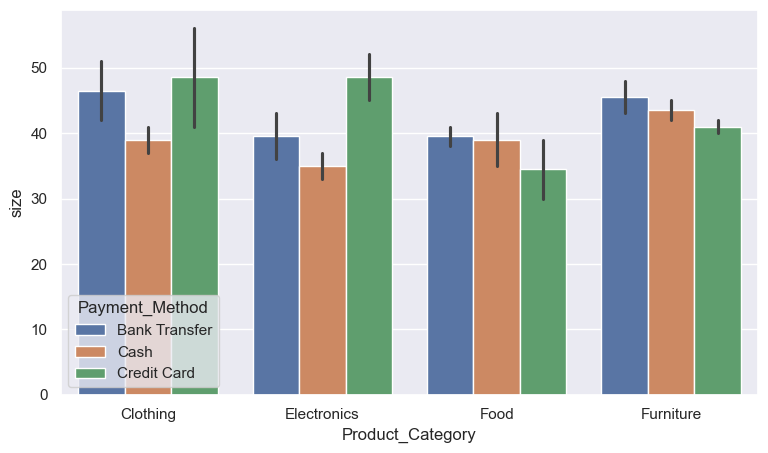

In [45]:
sns.set(rc={'figure.figsize':(9,5)})
sns.barplot(data= product_pivot, x= 'Product_Category', hue= 'Payment_Method',y = 'size')

<Axes: xlabel='Product_Category', ylabel='size'>

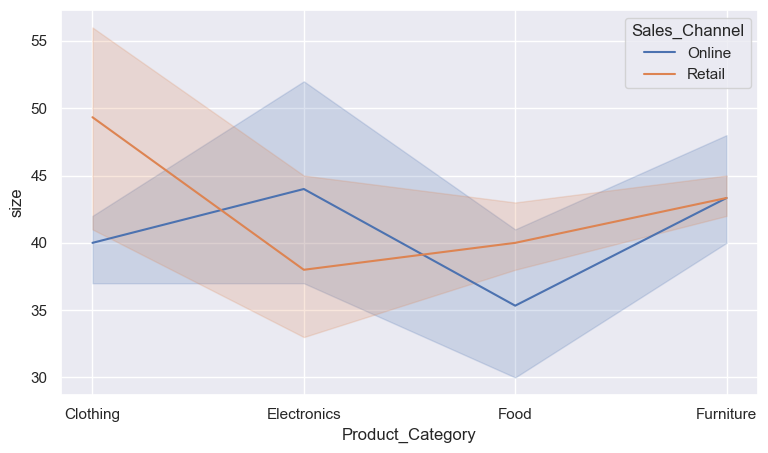

In [46]:
sns.lineplot(data= product_pivot, x= 'Product_Category', hue= 'Sales_Channel',y = 'size')

<Axes: xlabel='Product_Category', ylabel='size'>

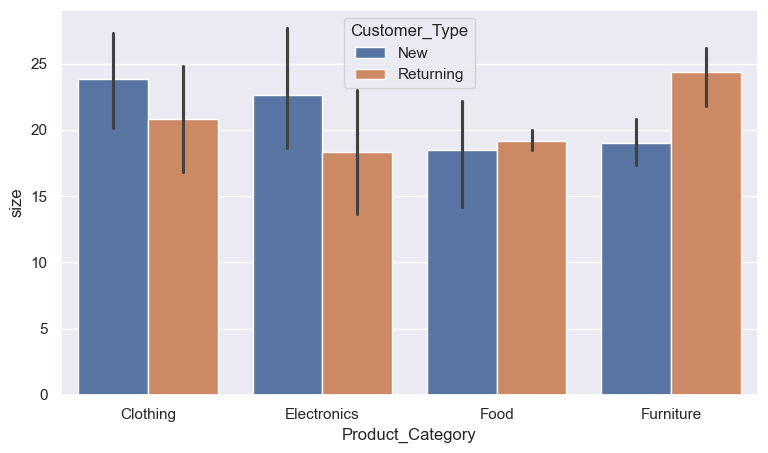

In [48]:
sns.barplot(data= product_pivot, x= 'Product_Category', hue= 'Customer_Type',y = 'size')

## Sales_Rep Customer_Type Sales_Channel Relation

In [53]:
represt_customer_channel = sales_data.groupby(['Sales_Rep','Customer_Type','Sales_Channel'],as_index= False).size()
represt_customer_channel.pivot(index= 'Sales_Rep',columns= ['Customer_Type','Sales_Channel'], values= 'size')

Customer_Type    New        Returning       
Sales_Channel Online Retail    Online Retail
Sales_Rep                                   
Alice             52     44        44     52
Bob               49     48        56     55
Charlie           44     40        44     41
David             57     60        49     56
Eve               52     58        41     58

<Axes: xlabel='Sales_Rep', ylabel='size'>

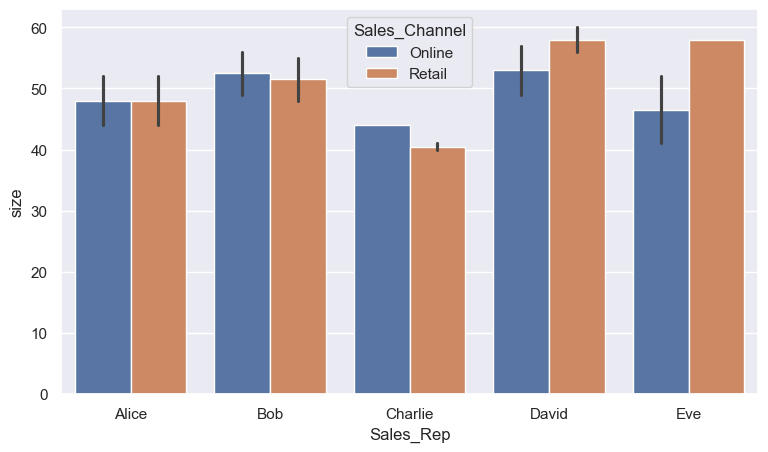

In [56]:
sns.set(rc={'figure.figsize':(9,5)})
sns.barplot(data= represt_customer_channel, x= 'Sales_Rep', y= 'size', hue= 'Sales_Channel' )

<Axes: xlabel='Sales_Rep', ylabel='size'>

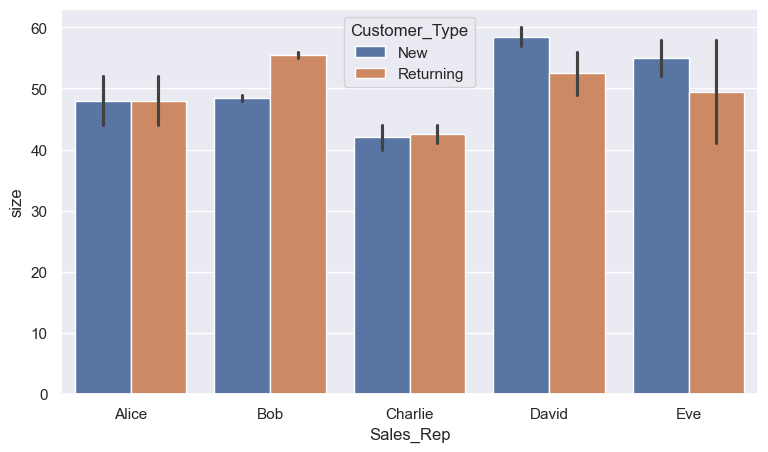

In [57]:
sns.barplot(data= represt_customer_channel, x= 'Sales_Rep', y= 'size', hue= 'Customer_Type' )